In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\wsaha\Documents\Insta basket analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'ords_prods_merge_updated.pkl'))

In [4]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_the _order_made,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,Bussiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_spend,spending_flag,median_order_frequency,order_frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Mid-range product,Regularly busy,Regular_days,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Mid-range product,Regularly busy,Slowest_Days,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,both,...,Mid-range product,Regularly busy,Slowest_Days,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Mid-range product,Least busy,Slowest_Days,Average_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,both,...,Mid-range product,Least busy,Slowest_Days,Most_orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


<Axes: xlabel='orders_day_of_week'>

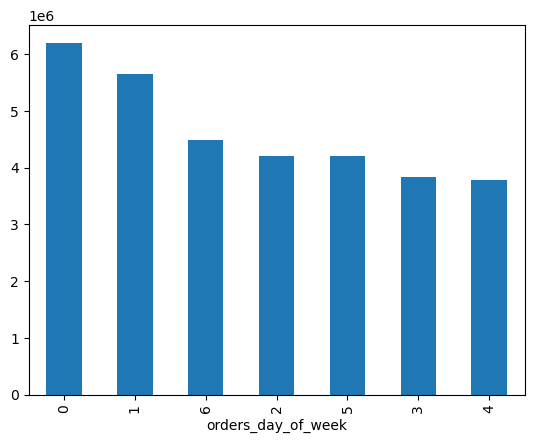

In [5]:
# Creating bar chart for orders_day_of_week

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

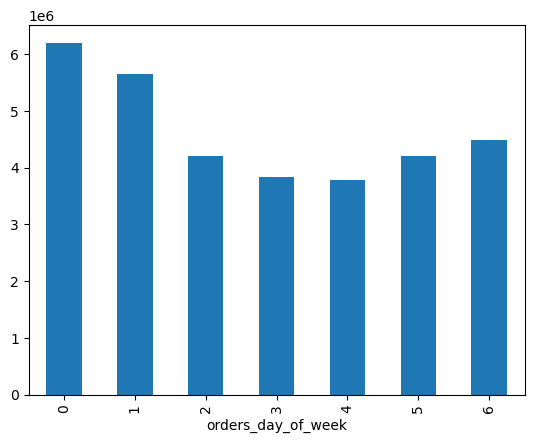

In [6]:
# removing Sorted chart according to value and sorting according to index
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_day_of_week'>

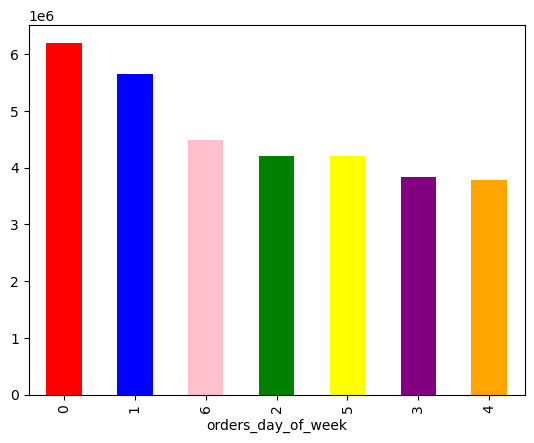

In [9]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color=['red', 'blue', 'pink', 'green', 'yellow', 'purple', 'orange'])

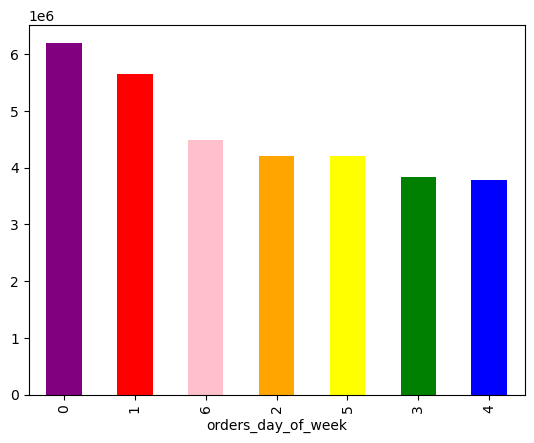

In [10]:
#Saving bar chart for exporting

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

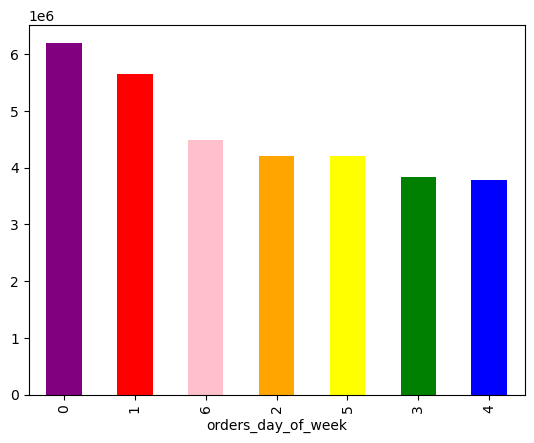

In [11]:
#Calling bar chart

bar.figure


In [12]:
#Saving the chart as a visualization

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

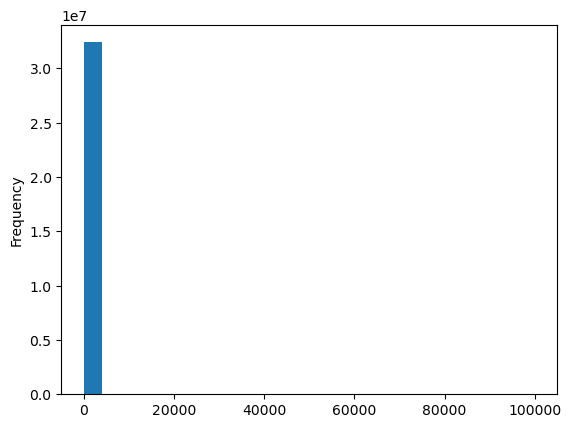

In [13]:
## Creating historgram for prices

ords_prods_merge['prices'].plot.hist(bins = 25)

In [15]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [ ]:
## As a result of higher max value histogram seems unreal

<Axes: xlabel='prices', ylabel='prices'>

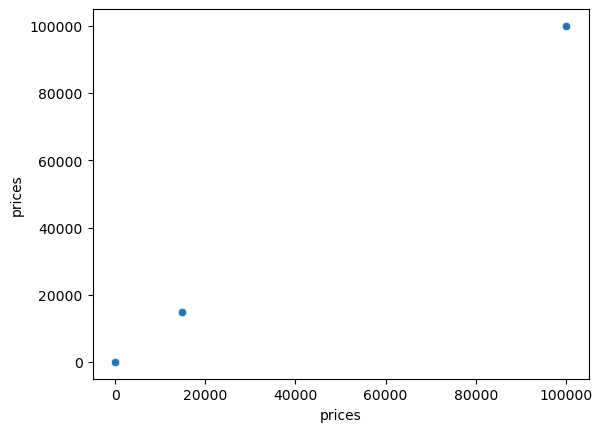

In [16]:
# checking for outliers with scatterplot

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [17]:
sns.scatterplot

<function seaborn.relational.scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)>

In [18]:
# checking for outliers. Prices paid over 100

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,hour_of_the _order_made,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,Bussiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_spend,spending_flag,median_order_frequency,order_frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,both,...,High-range product,Regularly busy,Regular_days,Most_orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,both,...,High-range product,Regularly busy,Regular_days,Most_orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,both,...,High-range product,Regularly busy,Regular_days,Average_orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,both,...,High-range product,Busiest day,Busiest_days,Average_orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,both,...,High-range product,Regularly busy,Busiest_days,Average_orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,both,...,High-range product,Busiest day,Busiest_days,Average_orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,both,...,High-range product,Busiest day,Busiest_days,Most_orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,both,...,High-range product,Regularly busy,Slowest_Days,Most_orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,both,...,High-range product,Regularly busy,Slowest_Days,Average_orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [19]:
# extracting collumsn to show price collumns exists
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 25 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   order_id                 int64   
 1   user_id                  int64   
 2   order_number             int64   
 3   orders_day_of_week       int64   
 4   hour_of_the _order_made  int64   
 5   days_since_prior_order   float64 
 6   product_id               int64   
 7   add_to_cart_order        int64   
 8   reordered                int64   
 9   _merge                   category
 10  product_name             object  
 11  aisle_id                 int64   
 12  department_id            int64   
 13  prices                   float64 
 14  merge_indicator          category
 15  price_range_loc          object  
 16  Bussiest_day             object  
 17  busiest_days             object  
 18  busiest_period_of_day    object  
 19  max_order                int64   
 20  loyalty_flag          

In [22]:
#extracting price collumn

ords_prods_merge.loc[ords_prods_merge['prices'] > 100, ['order_id', 'prices']]

,order_id,prices
10030345,912404,14900.0
10030346,603376,14900.0
10030347,3264360,14900.0
10030348,892534,14900.0
10030349,229704,14900.0
...,...,...
29166209,2249946,99999.0
29166210,2363282,99999.0
29166211,3181945,99999.0
29166212,2486215,99999.0


In [23]:
# define outliers as missing values

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [25]:
# chcking max value after removing outliers

ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

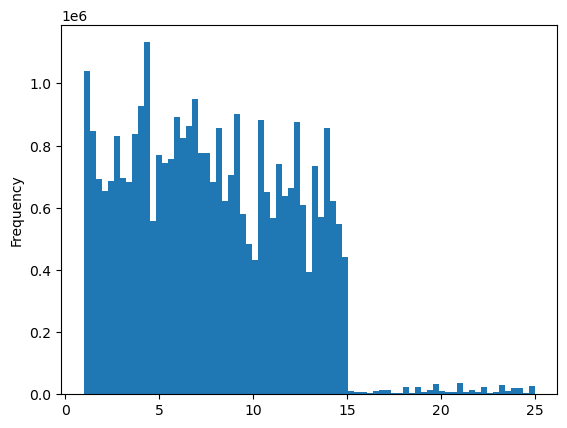

In [27]:
# Hostogram after removing outliers

ords_prods_merge['prices'].plot.hist(bins = 75)

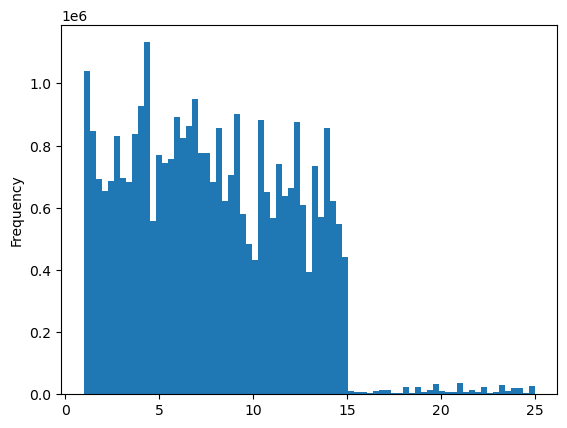

In [29]:
histo=ords_prods_merge['prices'].plot.hist(bins = 75)

In [30]:
#Saving histogram as png

histo.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histo_prices_dow.png'))

In [33]:
# creating seed to obtain sample for line chart to avoid memory clash due to large number of data
np.random.seed(4)

In [34]:
#This will be what stores your boolean values—you’ll be getting an output of True or False for every value based on whether 
#it’s less than or equal to 0.7:

dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [35]:
#70 percent of your dataframe in the big sample and 30 percent of your dataframe in the small sample.

big = ords_prods_merge[dev]

In [37]:
small = ords_prods_merge[~dev]

In [38]:
## Checking the accuracy of two sub sets to the population

len(ords_prods_merge)

32404859

In [40]:
len(big) + len(small)

32404859

In [41]:
#Seperating only required collumns for the line chart

df_2 = small[['orders_day_of_week','prices']]

C:\Users\wsaha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wsaha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


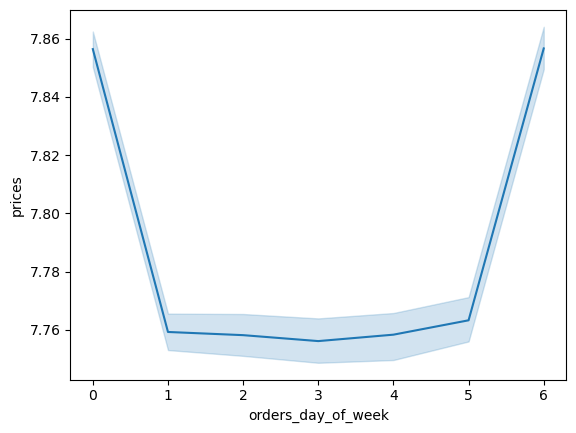

In [44]:
# Line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')